In [92]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### **Load Data**

In [104]:
fullstate = torch.load("data/HEBB-FULL-STATE_seed-0.pt" , weights_only=True)

In [113]:
state = torch.cat(fullstate["state"]).cpu().numpy()
action = torch.cat(fullstate["action"]).cpu().numpy()
lowpass_action = torch.cat(fullstate["action_lowpass"]).cpu().numpy()

### **Joint Trajectory**

In [95]:
def plot_state_action_trajectory(states , actions , num_steps):
    # Create the plot
    states = np.asarray(states)
    actions = np.asarray(actions)
    if len(states) != len(actions):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        # We'll proceed with the shorter length to avoid errors
        states = states[:num_steps]
        actions = actions[:num_steps]
    else:
        num_steps = len(states)
    # The 'x' values will be the step numbers (0, 1, 2, ..., num_steps-1)
    steps = np.arange(num_steps)
    # Create the plot
    plt.figure(figsize=(20, 4)) # Optional: set a larger figure size for clarity
    # Plot the state trajectory
    plt.plot(steps, states, color='blue', linestyle='-', marker='o', markersize=1 , label='state')
    # Plot the action trajectory
    plt.plot(steps, actions, color='red', linestyle='--', marker='x', markersize=1 , label='action')
    # Add labels and title
    plt.xlabel("Step Number")
    plt.ylabel("Value")
    plt.title("State and Action Trajectory Over Steps")
    # Add a legend to differentiate state and action lines
    plt.legend()

    # Add a grid for better readability
    plt.grid(True, linestyle=':', alpha=0.7)
    # Optional: Adjust y-axis limits if values are very different
    # plt.ylim(min(states.min(), actions.min()) * 0.9, max(states.max(), actions.max()) * 1.1)

    # Show the plot
    plt.show()

In [116]:
def plot_compare_trajectory(action1, action2, num_steps):
    action1 = np.asarray(action1)
    action2 = np.asarray(action2)

    if len(action1) != len(action2):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        action1 = action1[:num_steps]
        action2 = action2[:num_steps]
    else:
        num_steps = len(action1)

    steps = np.arange(num_steps)
    num_joints = action2.shape[1]

    plt.figure(figsize=(20, 2 * num_joints))

    for i in range(num_joints):
        plt.subplot(num_joints, 1, i + 1)
        plt.plot(steps, action1[:, i], color='blue', linestyle='-', marker='o', markersize=1, label='action1')
        plt.plot(steps, action2[:, i], color='red', linestyle='--', marker='x', markersize=1, label='action2')
        plt.ylabel(f"Joint {i}")
        if i == num_joints - 1:
            plt.xlabel("Step Number")
        plt.title(f"action1 vs action2 - Joint {i}")
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [97]:
def plot_state_action_all_joint_trajectory(states, actions, num_steps):
    states = np.asarray(states)
    actions = np.asarray(actions)

    if len(states) != len(actions):
        print("Warning: Length of states and actions do not match. Plotting might be inconsistent.")
        states = states[:num_steps]
        actions = actions[:num_steps]
    else:
        num_steps = len(states)

    steps = np.arange(num_steps)
    num_joints = actions.shape[1]

    plt.figure(figsize=(20, 2 * num_joints))

    for i in range(num_joints):
        plt.subplot(num_joints, 1, i + 1)
        plt.plot(steps, states[:, i], color='blue', linestyle='-', marker='o', markersize=1, label='state')
        plt.plot(steps, actions[:, i], color='red', linestyle='--', marker='x', markersize=1, label='action')
        plt.ylabel(f"Joint {i}")
        if i == num_joints - 1:
            plt.xlabel("Step Number")
        plt.title(f"State vs Action - Joint {i}")
        plt.legend()
        plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()

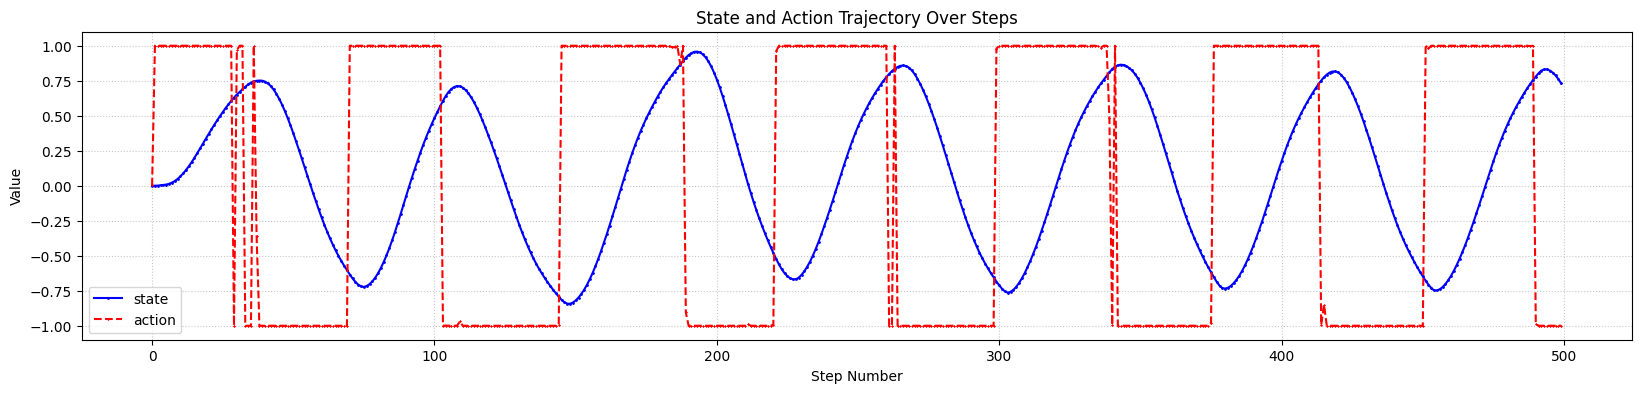

In [107]:
plot_state_action_trajectory(states=state[:,0] , actions=action[:,0] , num_steps=500)

In [108]:
n_bins = 30
bins = np.linspace(-1, 1, n_bins)
print("BIN : " ,bins)
state_bin = np.digitize(state, bins=bins)
action_bin = np.digitize(action, bins=bins)

BIN :  [-1.         -0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241
 -0.5862069  -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931
 -0.17241379 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379
  0.24137931  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069
  0.65517241  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]


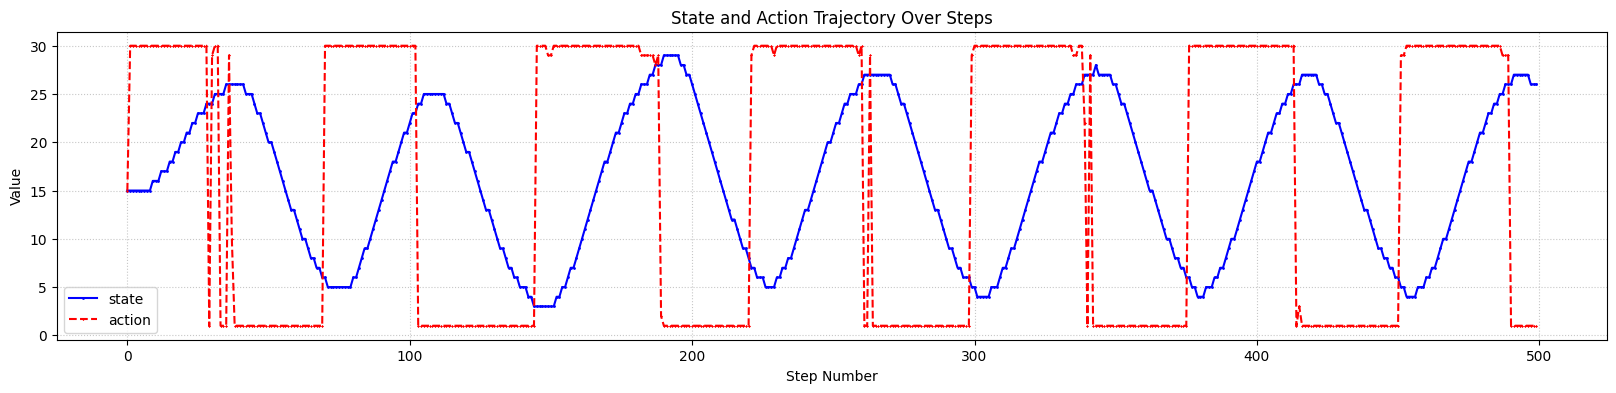

In [109]:
plot_state_action_trajectory(states=state_bin[:,0] , actions=action_bin[:,0] , num_steps=500)

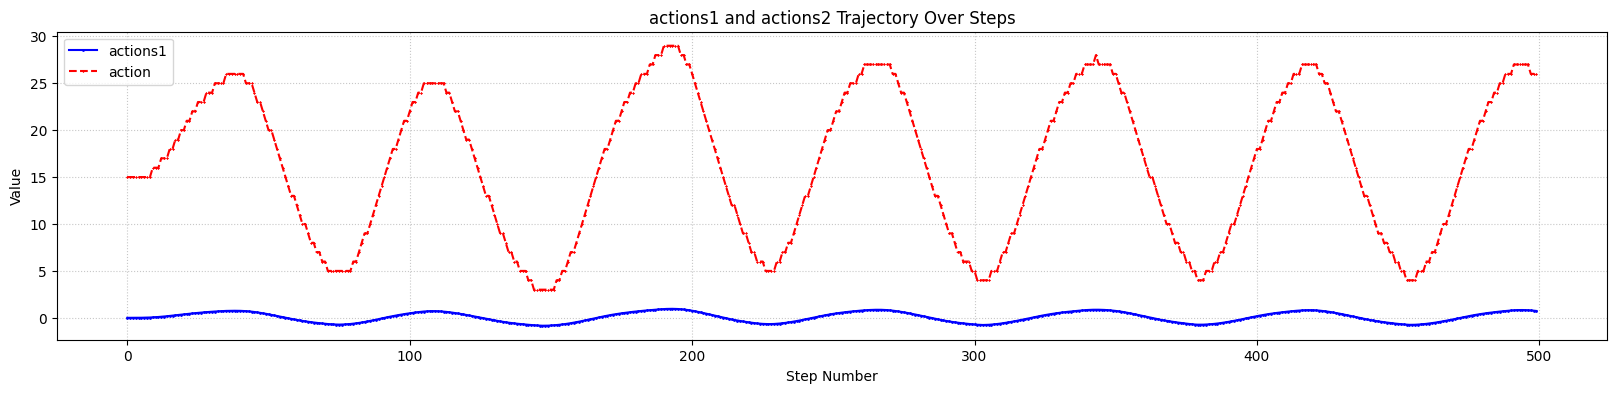

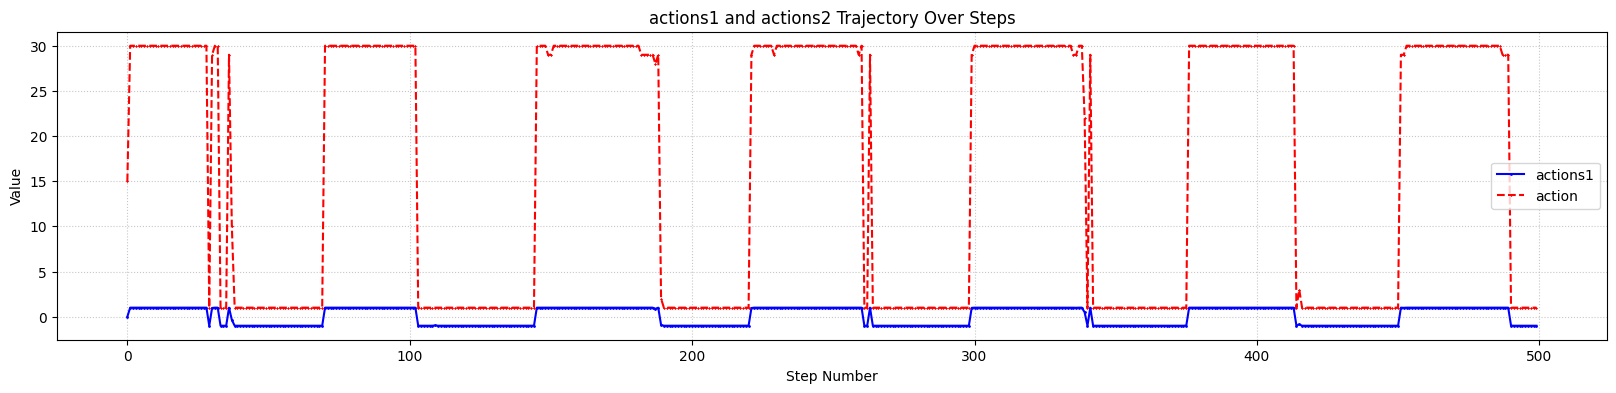

In [110]:
plot_compare_trajectory(state[:,0] , state_bin[:,0] , 500)
plot_compare_trajectory(action[:,0] , action_bin[:,0] , 500)

#### **Compare pure policy action**

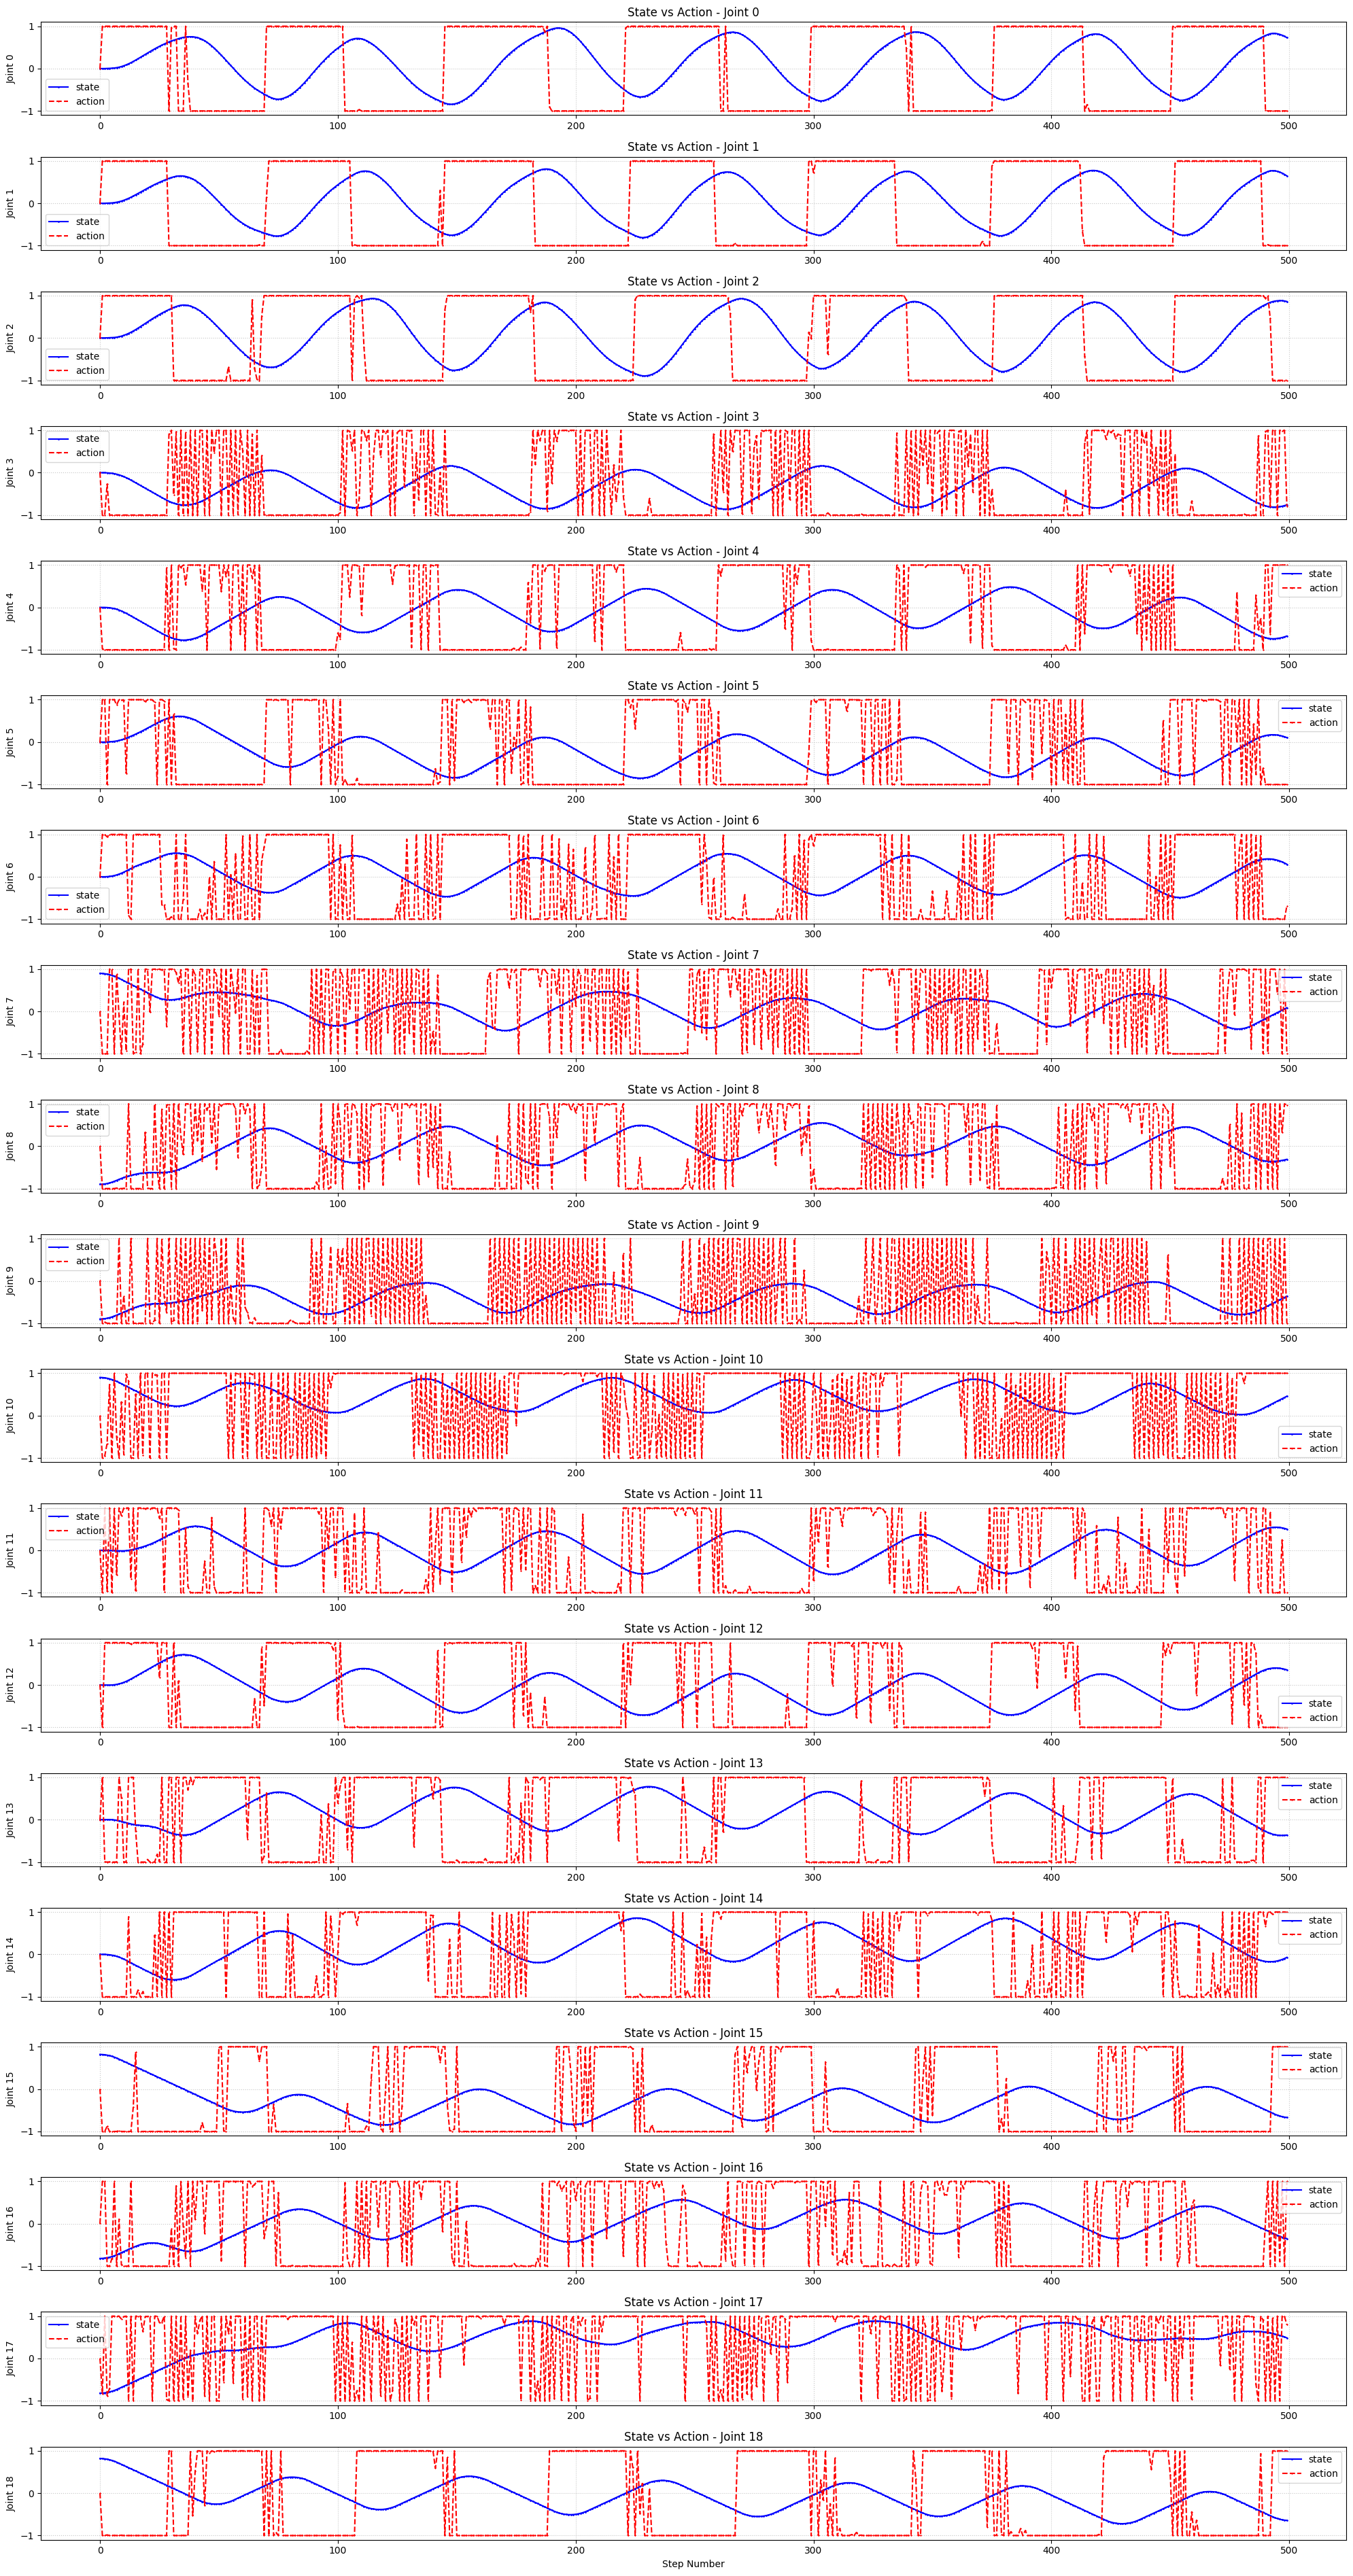

In [111]:
plot_state_action_all_joint_trajectory(states=state[:,:19] , actions=action , num_steps=500)

#### **Compare lowpass policy action**

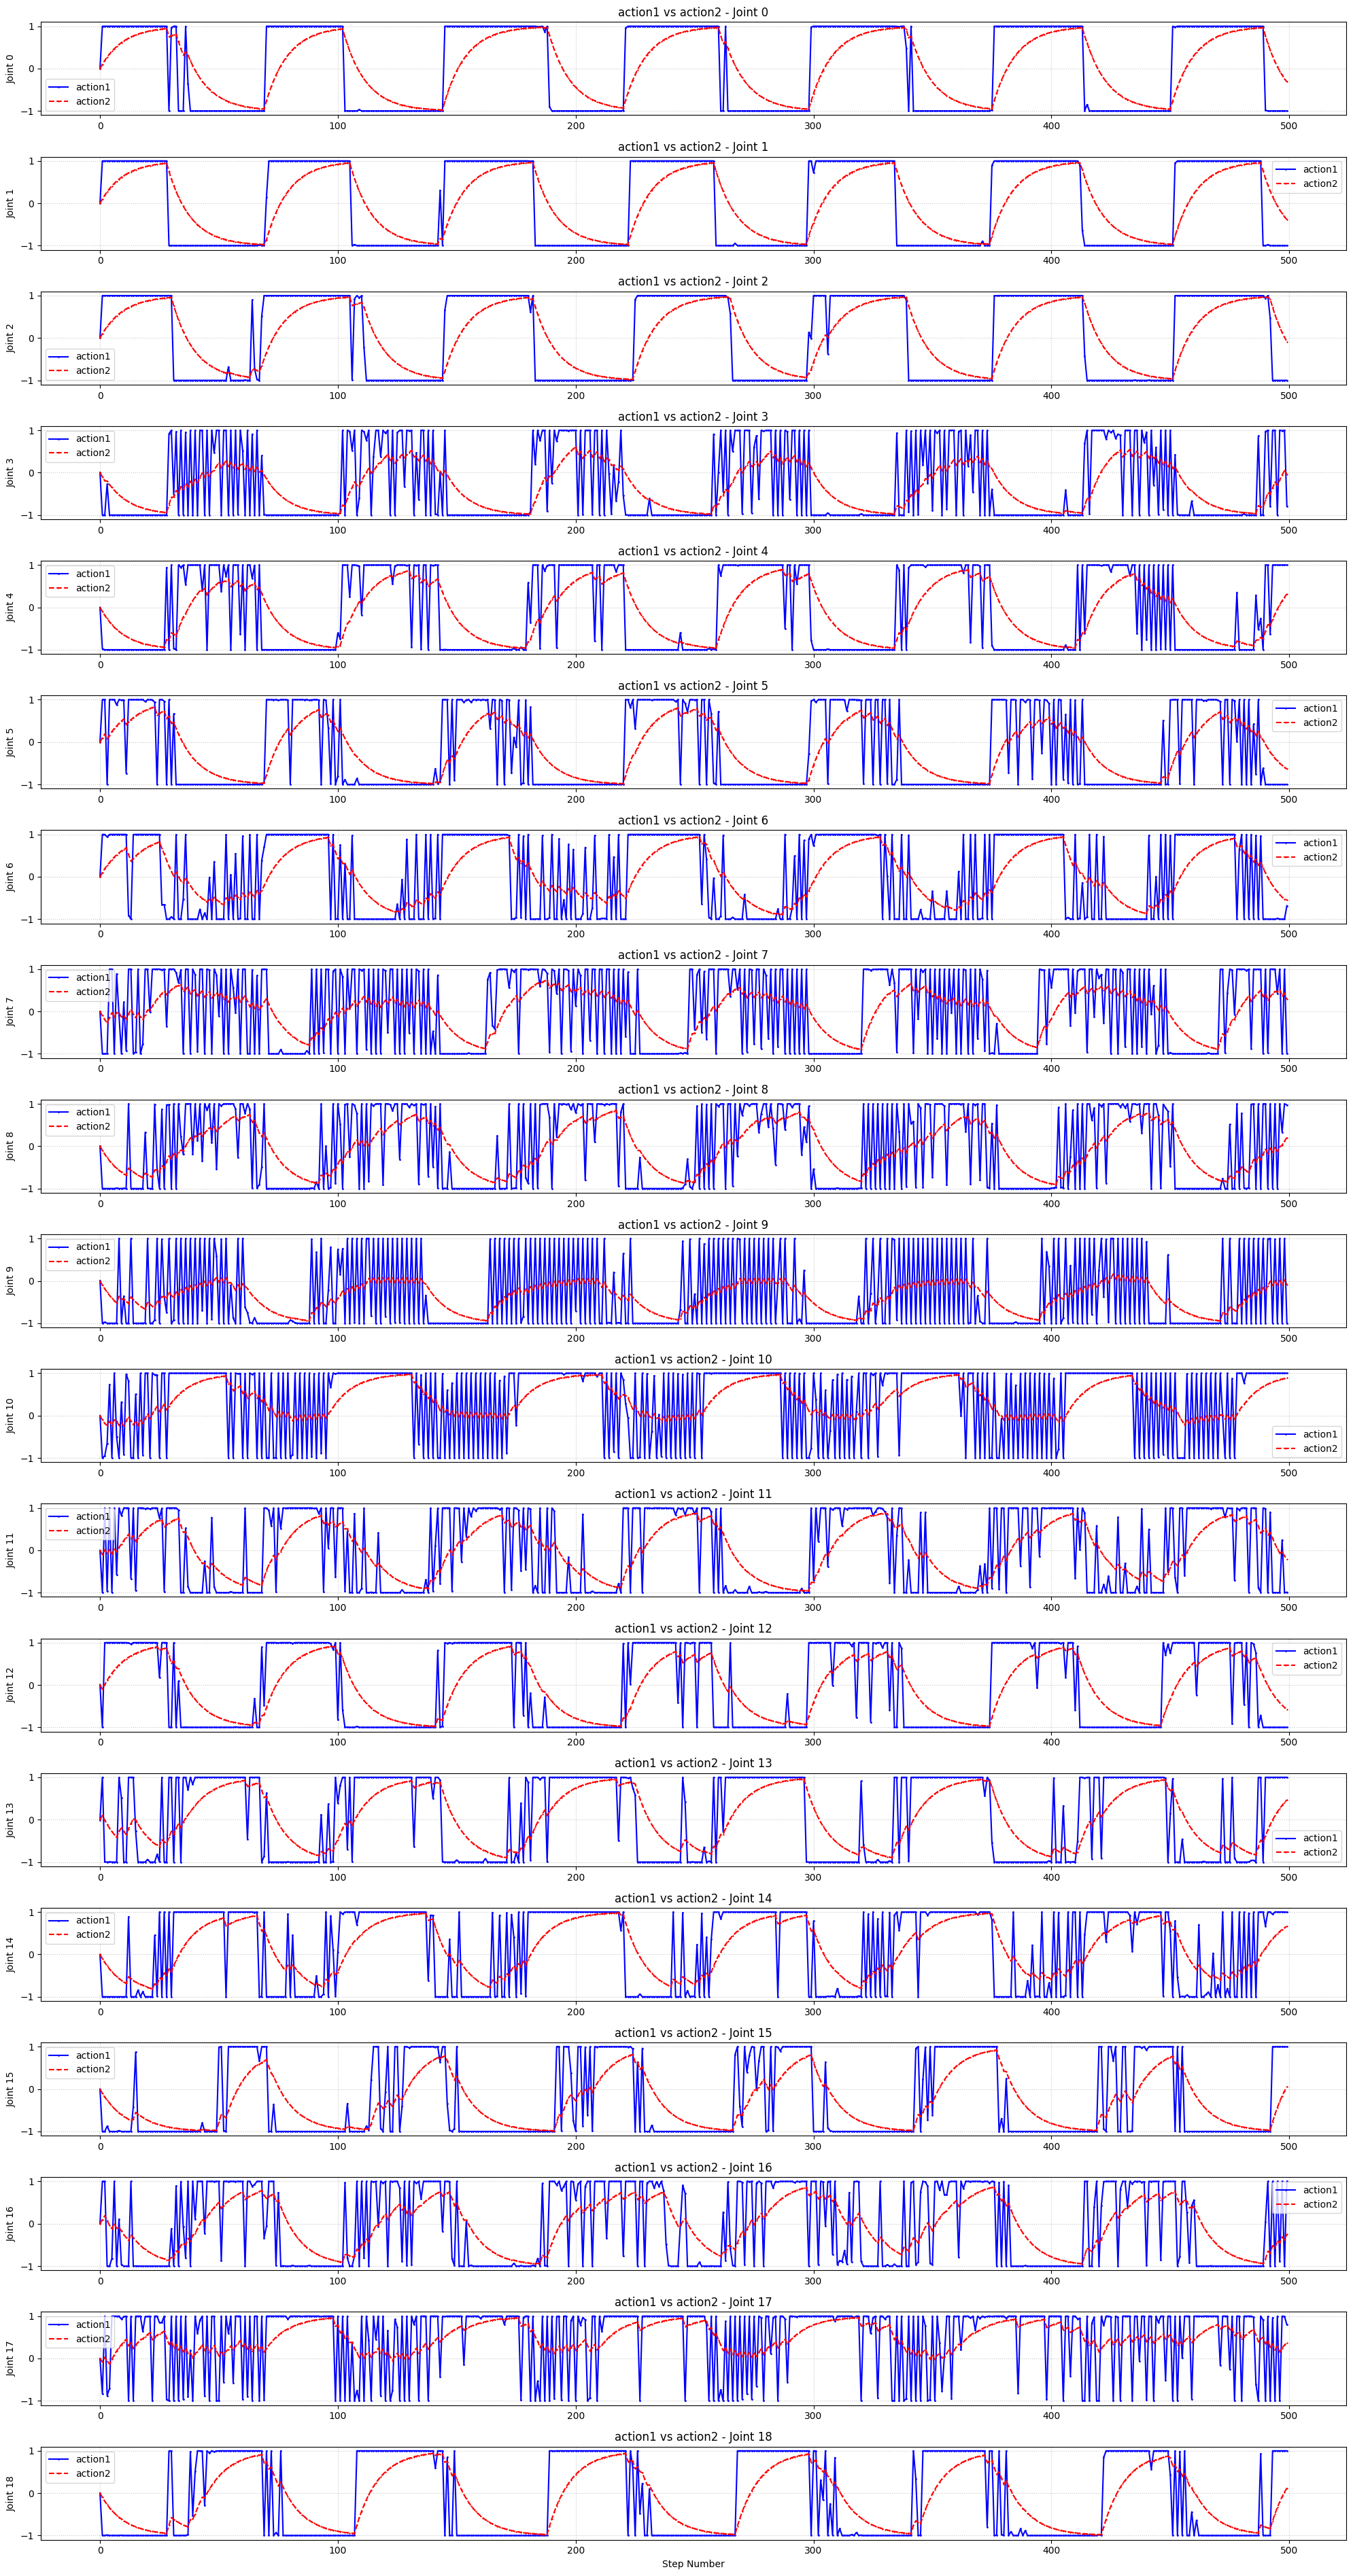

In [118]:
plot_compare_trajectory(action1=action , action2=lowpass_action , num_steps=500)